# AccelerateAI - Gain and Lift Chart

Context:
We are using a sample dataset called ```load_breast_cancer``` dataset which comes along with sklearn. This dataset can be used to classify cancer scans as benign or malignant.

* This is a binary classification dataset
* It has no Missing attribute or Null values
* Class: benign=357 rows and malignant=212 rows 


Dataset Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

We are leveraging a package called scikitplot to draw some quick charts.

* ```scikitplot.metrics.plot_roc```(y_true, y_probas, title='ROC Curves', plot_micro=True, plot_macro=True, classes_to_plot=None, ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium') - Generates the ROC curves from labels and predicted scores/probabilities

* ```scikitplot.metrics.plot_confusion_matrix```(y_true, y_pred, labels=None, true_labels=None, pred_labels=None, title=None, normalize=False, hide_zeros=False, hide_counts=False, x_tick_rotation=0, ax=None, figsize=None, cmap='Blues', title_fontsize='large', text_fontsize='medium') - Generates confusion matrix plot from predictions and true labels

Similarly others can also be explored.

Metrics module Ref: https://scikit-plot.readthedocs.io/en/stable/metrics.html

## Import Libraries and Load Dataset

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict # Plotting Confusion Matrix

# A jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [4]:
X_train.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.65990,0.25420,0.2929,0.09873
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,0.2873,0.9173,2.464,28.09,0.004563,0.03481,0.038720,0.012090,0.01388,0.004081,18.55,25.09,126.90,1031.0,0.1365,0.4706,0.50260,0.17320,0.2770,0.10630
384,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,0.1617,0.05594,0.1833,0.5308,1.592,15.26,0.004271,0.02073,0.028280,0.008468,0.01461,0.002613,14.24,17.37,96.59,623.7,0.1166,0.2685,0.28660,0.09173,0.2736,0.07320
222,10.18,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,0.2467,1.2170,1.641,15.05,0.007899,0.01400,0.008534,0.007624,0.02637,0.003761,11.17,22.84,71.94,375.6,0.1406,0.1440,0.06572,0.05575,0.3055,0.08797
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.03288,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858


In [5]:
y_train.sample(5)

65     0
535    0
218    0
378    1
204    1
Name: target, dtype: int32

## Fit LR Model

In [6]:
lr = LogisticRegression()
lr_clf = lr.fit(X_train, y_train)
predicted_probas = lr.predict_proba(X_test)

## Charts

```cross_val_predict``` from ```sklearn.model_selection``` generates cross-validated estimates for each sample point in our dataset. Comparing the cross-validated estimates with the true labels, we’ll be able to get evaluation metrics such as accuracy, precision, recall, and the confusion matrix etc.

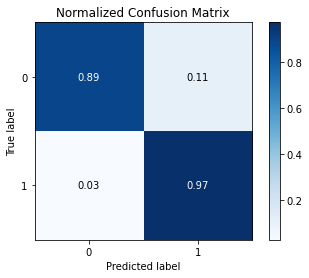

In [7]:
#from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(lr_clf, X_test, y_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)

plt.show()

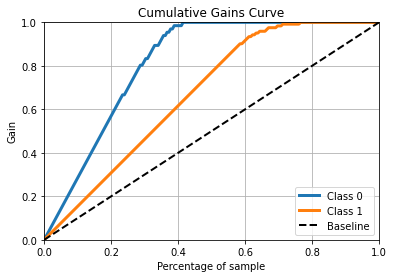

In [8]:
# The magic happens here
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

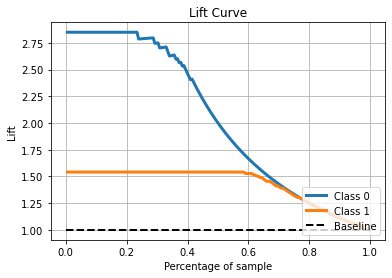

In [9]:
skplt.metrics.plot_lift_curve(y_test, predicted_probas)

plt.show()

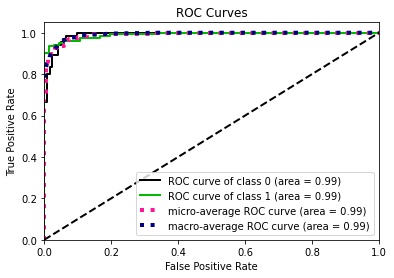

In [10]:
skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

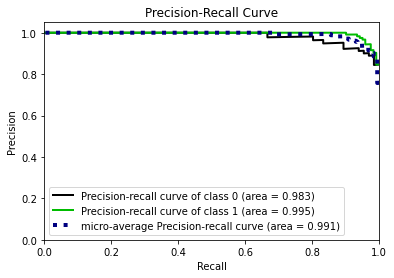

In [11]:
skplt.metrics.plot_precision_recall(y_test, predicted_probas)

plt.show()

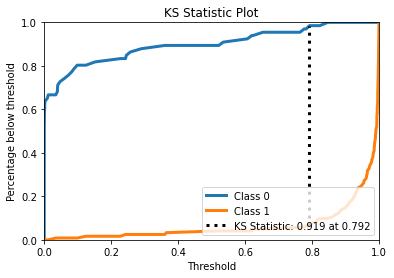

In [12]:
skplt.metrics.plot_ks_statistic(y_test, predicted_probas)

plt.show()

#### Calibration Curve

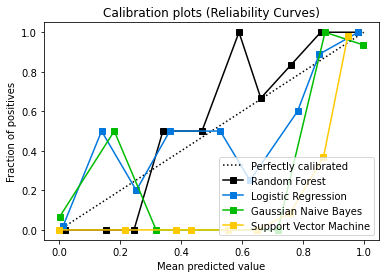

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

lr = LogisticRegression()
rf = RandomForestClassifier()
nb = GaussianNB()
svm = LinearSVC()

rf_probas = rf.fit(X_train, y_train).predict_proba(X_test)
lr_probas = lr.fit(X_train, y_train).predict_proba(X_test)
nb_probas = nb.fit(X_train, y_train).predict_proba(X_test)
svm_scores = svm.fit(X_train, y_train).decision_function(X_test)

probas_list = [rf_probas, lr_probas, nb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression','Gaussian Naive Bayes', 'Support Vector Machine']

skplt.metrics.plot_calibration_curve(y_test,probas_list,clf_names)
plt.show()